# Sales Analysis

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

get files names using os.listdir

In [3]:
files = [file for file in os.listdir("./Sales_Data")]
#print(files)

#### Importing Files

Reading each file individually and then concatenete them into a single DataFrame

In [4]:
paths = []
for m in files:
    paths.append(f"./Sales_Data/{m}")
    
df = pd.concat(map(pd.read_csv, paths))
df.shape

(186850, 6)

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### What was the best month for sales? How much was earned that month?

#### Cleaning the data
droping heading values that were copied into the dataset, droping NaN values

In [6]:
df = df.drop(df[df['Order Date'] == 'Order Date'].index)
df.dropna(inplace=True)
df.shape

(182735, 6)

setting the correct data types to columns

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [8]:
df['Total'] = df['Quantity Ordered']*df['Price Each']

In [9]:
monthly = df.groupby(df['Order Date'].dt.month)['Total'].sum()
print(f'the greater sales amount was for {monthly.max():,.2f}')

the greater sales amount was for 4,557,905.42


<AxesSubplot:xlabel='Order Date'>

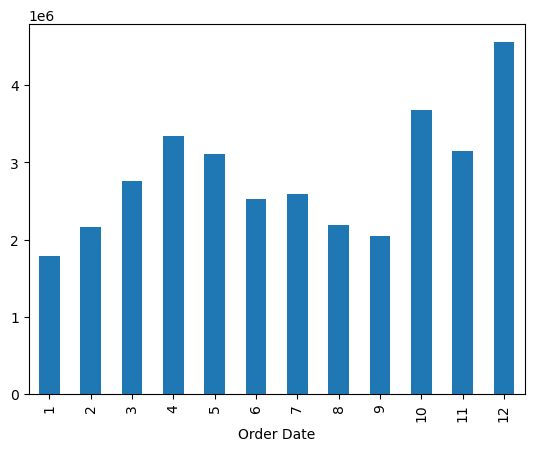

In [10]:
monthly.plot.bar()

### What city has the greates number of sales?

In [11]:
df['Purchase Address'] = df['Purchase Address'].astype('string') #convert the object type into string
df['Product'] = df['Product'].astype('string') #convert the object type into string

In [12]:
df['Purchase Address'].dtype

string[python]

I could have used the `.apply()` method, `df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])`

In [13]:
#df['City'] = df['Purchase Address'].str.split(',').str[1]
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')')
cities = df.groupby(df['City'])['Total'].sum()
cities.sort_values()

City
 Portland (ME)          444,110.53
 Austin (TX)          1,786,745.52
 Portland (OR)        1,832,538.71
 Seattle (WA)         2,693,048.60
 Dallas (TX)          2,717,793.72
 Atlanta (GA)         2,741,642.05
 Boston (MA)          3,604,080.86
 New York City (NY)   4,581,658.91
 Los Angeles (CA)     5,354,039.93
 San Francisco (CA)   8,124,120.94
Name: Total, dtype: float64

<AxesSubplot:xlabel='City'>

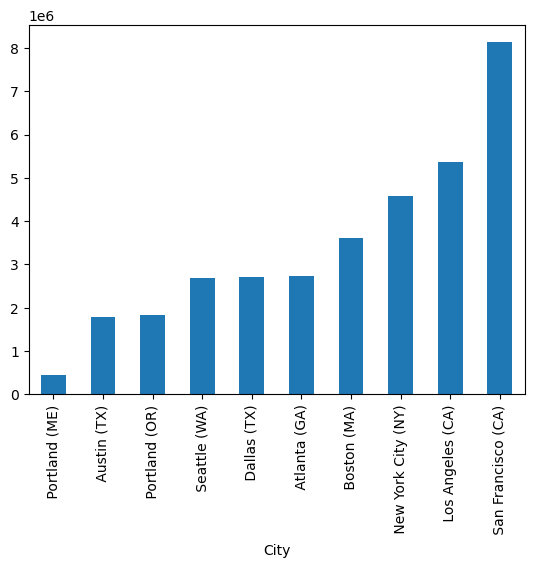

In [14]:
cities.sort_values().plot.bar()

### what time should we display advertisements to maximize likelihood of customer's buying products? 
first i'm going to define at what time of day is the peak of sales

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA)


In [16]:
df['Hour'] = df['Order Date'].dt.hour

In [17]:
dfc = df.groupby(['City','Hour'])['Total'].agg(['sum','count']) #group by city, then by hour and creates
dfc['norm_total'] = dfc.groupby('City')['sum'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
dfc['norm_count'] = dfc.groupby('City')['count'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

#grouped_data['norm_total'] = grouped_data.groupby('City')['sum'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
#grouped_data['norm_count'] = grouped_data.groupby('City')['count'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

dfc.tail()

sum  count  norm_total  norm_count
City          Hour                                          
 Seattle (WA) 19   181,944.80    975        0.99        0.97
              20   164,702.81    972        0.89        0.97
              21   169,070.08    852        0.92        0.84
              22   135,849.93    684        0.73        0.66
              23   101,102.44    543        0.53        0.51

In [18]:
sales_hour = df.groupby(['Hour'])['Total'].sum()
count_hour = df.groupby(['Hour']).count()
max_s =sales_hour.max()
min_s =sales_hour.min()
norm_s = (sales_hour - min_s)/(max_s - min_s)

max_c = count_hour.max()
min_c = count_hour.min()
norm_c = (count_hour - min_c)/(max_c - min_c)

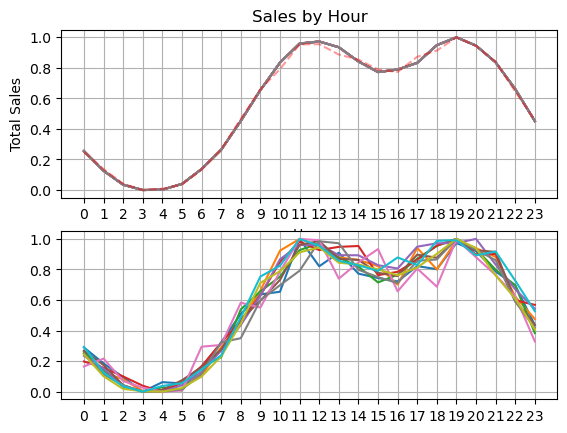

In [19]:
sales_hour = df.groupby(df['Hour'])['Total'].sum()
count_hour = df.groupby(df['Hour']).count()

fig, axs = plt.subplots(2,1)
sales_hour = df.groupby(df['Hour'])['Total'].sum()
x = [hour for hour, df in df.groupby(df['Hour'])]

axs[0].plot(x, norm_c)
axs[0].set_title('Sales by Hour')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Total Sales')
axs[0].set_xticks(x)
axs[0].grid()

axs[0].plot(x, norm_s, linestyle='--', color='r', alpha=0.4)

#Try making the same but for each city

for city, group in dfc.groupby('City'):
    axs[1].plot(group.index.get_level_values('Hour'), group['norm_total'], label=f'{city} Sales')
    
axs[1].set_xticks(x)
axs[1].grid()


#### The advertisements should be realease at the peak moments, 11am an 7pm


### What products are more often sold together?

In [20]:
df1 = df

In [21]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA),9


In [22]:
products = df1.groupby('Order Date')
products = products.filter(lambda x: x['Product'].count() > 1 )

In [37]:
prods = []
for date, prod in products.groupby('Order Date')['Product']:
    prods.append(prod.tolist())

In [55]:
prod_names = df1['Product'].unique().tolist()
prod_dic = {}
for item in prod_names:
    prod_dic[item] = {i:0 for i in prod_names if i!=item}
    
prod_dic[prod_names[0]]
    

{'Bose SoundSport Headphones': 0,
 'Google Phone': 0,
 'Wired Headphones': 0,
 'Macbook Pro Laptop': 0,
 'Lightning Charging Cable': 0,
 '27in 4K Gaming Monitor': 0,
 'AA Batteries (4-pack)': 0,
 'Apple Airpods Headphones': 0,
 'AAA Batteries (4-pack)': 0,
 'iPhone': 0,
 'Flatscreen TV': 0,
 '27in FHD Monitor': 0,
 '20in Monitor': 0,
 'LG Dryer': 0,
 'ThinkPad Laptop': 0,
 'Vareebadd Phone': 0,
 'LG Washing Machine': 0,
 '34in Ultrawide Monitor': 0}

In [58]:
aux_df = pd.DataFrame(index=prod_names, columns=prod_names)
aux_df.fillna(0, inplace=True)
aux_df

,USB-C Charging Cable,Bose SoundSport Headphones,Google Phone,Wired Headphones,Macbook Pro Laptop,Lightning Charging Cable,27in 4K Gaming Monitor,AA Batteries (4-pack),Apple Airpods Headphones,AAA Batteries (4-pack),iPhone,Flatscreen TV,27in FHD Monitor,20in Monitor,LG Dryer,ThinkPad Laptop,Vareebadd Phone,LG Washing Machine,34in Ultrawide Monitor
USB-C Charging Cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bose SoundSport Headphones,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Google Phone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wired Headphones,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Macbook Pro Laptop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lightning Charging Cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27in 4K Gaming Monitor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AA Batteries (4-pack),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Apple Airpods Headphones,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AAA Batteries (4-pack),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
for order in prods:
    for i in range(len(order)):
        for j in range(len(order)):
            aux_df.at[order[i],order[j]] += 1

In [61]:
for prod in prod_names:
    aux_df.at[prod, prod] = 0

In [62]:
aux_df

,USB-C Charging Cable,Bose SoundSport Headphones,Google Phone,Wired Headphones,Macbook Pro Laptop,Lightning Charging Cable,27in 4K Gaming Monitor,AA Batteries (4-pack),Apple Airpods Headphones,AAA Batteries (4-pack),iPhone,Flatscreen TV,27in FHD Monitor,20in Monitor,LG Dryer,ThinkPad Laptop,Vareebadd Phone,LG Washing Machine,34in Ultrawide Monitor
USB-C Charging Cable,0,857,1294,1284,293,1292,387,1221,979,1340,386,259,499,265,45,261,453,26,383
Bose SoundSport Headphones,857,0,395,737,185,878,244,792,605,774,239,167,281,158,27,157,142,33,223
Google Phone,1294,395,0,705,66,358,96,299,243,326,105,78,108,53,14,67,40,11,105
Wired Headphones,1284,737,705,0,252,1167,340,1064,880,1149,795,246,409,200,33,186,244,39,367
Macbook Pro Laptop,293,185,66,252,0,306,104,245,200,276,106,45,97,58,7,57,22,5,95
Lightning Charging Cable,1292,878,358,1167,306,0,368,1239,962,1281,1351,267,451,261,32,271,117,37,396
27in 4K Gaming Monitor,387,244,96,340,104,368,0,352,256,343,125,70,140,66,8,68,33,17,116
AA Batteries (4-pack),1221,792,299,1064,245,1239,352,0,910,1274,398,275,423,258,41,228,132,29,383
Apple Airpods Headphones,979,605,243,880,200,962,256,910,0,927,620,200,310,176,21,163,91,28,274
AAA Batteries (4-pack),1340,774,326,1149,276,1281,343,1274,927,0,360,259,428,232,42,239,114,45,383


In [67]:
aux_df.max()

USB-C Charging Cable          10484
Bose SoundSport Headphones     5819
Google Phone                   3098
Wired Headphones               8878
Macbook Pro Laptop             1874
Lightning Charging Cable      10096
27in 4K Gaming Monitor         2511
AA Batteries (4-pack)          9093
Apple Airpods Headphones       6902
AAA Batteries (4-pack)         9172
iPhone                         3696
Flatscreen TV                  1860
27in FHD Monitor               3101
20in Monitor                   1637
LG Dryer                        255
ThinkPad Laptop                1602
Vareebadd Phone                1080
LG Washing Machine              260
34in Ultrawide Monitor         2536
dtype: int64